In [173]:
pip install squarify

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import squarify

from google.colab import drive

# PART 1: EDA

In [175]:
ecommerce_df = pd.read_excel("/content/drive/MyDrive/D.A/Python/Final Project/ecommerce retail.xlsx", sheet_name="ecommerce retail")


In [176]:
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Check missing values, incorrect data, duplicates, outlier
=> `Quantity`, `UnitPrice` có nhiều giá trị âm

=> `Description`, `CustomerID` có nhiều giá trị null (1454, 135080)

=> `CustomerID` có datatype chưa đúng (float)

=> `Description` viết hoa, thường lẫn lộn

=> Có 650 `StockCode` có từ 2 `Description` trở lên

=> Có 3603 `StockCode` có từ 2 `UnitPrice` trở lên, thậm chí có `UnitPrice` = 0 => dự đoán: mức giá thay đổi liên tục khiến UnitPrice không thống nhất; UnitPrice = 0 có thể là hàng tặng kèm

In [177]:
  #tổng quan dữ liệu
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


=> `CustomerID`có datatype chưa đúng (float) ==> convert string

In [178]:
  #count null values
ecommerce_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

=> `Description`, `CustomerID` có nhiều giá trị null (1454, 135080)

In [179]:
  #check outliers: giá trị âm
ecommerce_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


=> `Quantity`, `UnitPrice` có giá trị âm

In [180]:
  #check unique value for `InvoiceNo`
ecommerce_df["InvoiceNo"].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [181]:
  #check unique value for `StockCode`
ecommerce_df["StockCode"].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [182]:
  #check unique value for `Description`
ecommerce_df["Description"].str.islower().unique()

array([False, nan, True], dtype=object)

=> `Description` viết hoa, thường lẫn lộn

In [183]:
  #check unique value for `Quantity`
ecommerce_df["Quantity"].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

=> `Quantity` có rất nhiều giá trị âm

In [184]:
  #check unique value for `InvoiceDate`
ecommerce_df["InvoiceDate"].unique()

<DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 23260, dtype: datetime64[ns]

In [185]:
  #check unique value for `UnitPrice`
ecommerce_df["UnitPrice"].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [186]:
  #check unique value for `CustomerID`
ecommerce_df["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

=> `CustomerID` có datatype chưa đúng (float)

In [187]:
  #check unique value for `Country`
ecommerce_df["Country"].str.islower().unique()

array([False])

=> `Country` không viết hoa, thường lẫn lộn

In [188]:
  #check duplicates: StockCode-Description
(ecommerce_df[["StockCode","Description"]].groupby("StockCode").nunique("Description") > 1).sum()

Description    650
dtype: int64

=> Có 650 StockCode có từ 2 Description trở lên

In [189]:
  #check duplicates: InvoiceNo-CustomerID
(ecommerce_df[["InvoiceNo","CustomerID"]].groupby("InvoiceNo").nunique("CustomerID") > 1).sum()

CustomerID    0
dtype: int64

=> 1 InvoiceNo chỉ có duy nhất 1 CustomerID

In [190]:
  #check duplicates: StockCode-UnitPrice
(ecommerce_df[["StockCode","UnitPrice"]].groupby("StockCode").nunique("UnitPrice") > 1).sum()

UnitPrice    3603
dtype: int64

## Fix error

=> `Description` viết hoa chữ cái đầu

=> `Description` fill 1454 giá trị null bằng giá trị có `StockCode` giống nhau + bỏ 185 null values sót lại

=> `Description`: thống nhất 1 Descrition-1 StockCode

=> `Quantity`, `UnitPrice`: xóa giá trị âm

=> `CustomerID` fill 135080 null values, chuyển sang datatype int

### `Description`: viết hoa chữ cái đầu + fill 1454 null values + thống nhất 1 StockCode - 1 Description
- ý tưởng là dựa trên cùng StockCode, fill Description

In [191]:
df_clean = ecommerce_df.copy()
    #viết hoa chữ cái đầu các value của Description
df_clean["Description"] = df_clean["Description"].str.capitalize()

In [192]:
    #fill 1454 null values
df_clean["Description"] = df_clean.groupby("StockCode")["Description"].ffill()
    #bỏ 185 null values còn sót lại
df_clean = df_clean[df_clean["Description"].isnull() == False]

df_clean["Description"].isnull().sum()

0

In [193]:
    #thống nhất 1 StockCode - 1 Description

#tạo dim product thỏa điều kiện: 1 StockCode - 1 Description
dim_product = df_clean[["StockCode","Description"]].groupby(["StockCode","Description"]).size().reset_index().sort_values(0,ascending=False).drop_duplicates("StockCode")

#map(ánh xạ) value của cột dim_product["Description"] với cột df_clean["Description"]
df_clean["Description"] = df_clean["StockCode"].map(dim_product.set_index("StockCode")["Description"])

#check duplicates: StockCode-Description
(df_clean[["StockCode","Description"]].groupby("StockCode").nunique("Description") > 1).sum()

Description    0
dtype: int64

=> bây giờ 1 StockCode có duy nhất 1 Description

### `Quantity`, `UnitPrice`: xóa giá trị âm

In [194]:
    #xóa giá trị âm khỏi dataframe
df_clean = df_clean[(df_clean["Quantity"] >= 0) & (df_clean["UnitPrice"] >= 0)]
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,White hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,White metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,Cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,Knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,Red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,Pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,Children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,Childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,Childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


### `CustomerID`: fill 135080 null values + chuyển sang datatype int
- ý tưởng 1: dựa trên InvoiceNo, ffill CustomerID (cùng 1 InvoiceNo thì có duy nhất 1 CustomerID)
- ý tưởng 2: fill CustomerID giả định (giả sử các CustomerID null là KH vãng lai, chỉ mua 1 lần => CustomerID giả định chỉ xuất hiện 1 lần duy nhất)

In [195]:
    #check giả thuyết 1 InvoiceNo có nhiều CustomerID
pivot = df_clean.groupby("InvoiceNo").agg({"CustomerID": "nunique"}).rename(columns={"CustomerID":"count_customerid"}).reset_index()
(pivot["count_customerid"]> 1).sum()

0

=> vậy 1 InvoiceNo có tương ứng duy nhất 1 CustomerID

In [196]:
    #solution 1: forward fill CustomerID có cùng InvoiceNo
df_clean["CustomerID"] = df_clean.groupby("InvoiceNo")["CustomerID"].ffill()
df_clean["CustomerID"].isnull().sum()

133303

=> null values CustomerID không đổi - nghĩa là với cùng InvoiceNo, không có giá trị CustomerID ở bất kỳ hàng nào để fill xuống

=> ý tưởng mới là fill giả định CustomerID vì số lượng null values quá lớn, ảnh hưởng đến việc segment

In [197]:
    #tạo array chứa các InvoiceNo mà giá trị CustomerID bị null
null_customerid = df_clean[df_clean["CustomerID"].isnull()]["InvoiceNo"].unique()
null_customerid

array([536414, 536544, 536555, ..., 581492, 581497, 581498], dtype=object)

In [198]:
    #fill CustomerID giả định

# tìm max CustomerID để fill giả định CustomerID mà không gây ra duplicates
m = int(max(df_clean["CustomerID"]))

#tạo series_cus có: index = InvoiceNo, value = CustomerID giả định
series_cus = pd.Series(
    range(m+1, m+1+len(null_customerid))
    , index = null_customerid
)

#map value của series_cus với cột InvoiceNo trong df (note: chỉ chọn các ô có InvoiceNo nằm trong array null_customerid. Nếu không thì các ô không nằm trong sẽ bị null bên cột CustomerID)
df_clean.loc[df_clean["InvoiceNo"].isin(null_customerid),"CustomerID"] = df_clean["InvoiceNo"].map(series_cus)

#check nullvalues CustomerID
df_clean["CustomerID"].isnull().sum()

0

=> đã fill tất cả null CustomerID bằng CustomerID giả định

In [199]:
    #chuyển sang datatype int
df_clean["CustomerID"] = df_clean["CustomerID"].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531227 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531227 non-null  object        
 1   StockCode    531227 non-null  object        
 2   Description  531227 non-null  object        
 3   Quantity     531227 non-null  int64         
 4   InvoiceDate  531227 non-null  datetime64[ns]
 5   UnitPrice    531227 non-null  float64       
 6   CustomerID   531227 non-null  int64         
 7   Country      531227 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 52.6+ MB


=> Sau khi đã làm sạch thì:
- Các cột đều đưa về đúng dạng datatype
- Các cột đều không null

# PART 2: SEGMENTATION

In [200]:
df_enriched = df_clean.copy()

In [201]:
df_enriched["Rev"] = df_enriched["Quantity"] * df_enriched["UnitPrice"]
df_enriched.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev
0,536365,85123A,White hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,White metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,Cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,Knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,Red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Recency

In [202]:
  # recency
pivot_re = df_enriched.groupby("CustomerID").agg({"InvoiceDate": "max"}).reset_index()
pivot_re["CurrDate"] = "2011-12-31"
pivot_re["CurrDate"] = pd.to_datetime(pivot_re["CurrDate"])
pivot_re["Recency"] = (pivot_re["CurrDate"] - pivot_re["InvoiceDate"]).dt.days

#sắp xếp DayDiff giảm dần
pivot_re.sort_values("Recency", ascending=False)

,CustomerID,InvoiceDate,CurrDate,Recency
1038,13747,2010-12-01 10:37:00,2011-12-31,394
2629,15922,2010-12-01 13:51:00,2011-12-31,394
1323,14142,2010-12-01 16:33:00,2011-12-31,394
1393,14237,2010-12-01 13:20:00,2011-12-31,394
4342,18291,2010-12-01 14:48:00,2011-12-31,394
...,...,...,...,...
3754,17490,2011-12-09 09:08:00,2011-12-31,21
3137,16626,2011-12-09 11:56:00,2011-12-31,21
550,13069,2011-12-09 08:39:00,2011-12-31,21
2462,15694,2011-12-09 09:44:00,2011-12-31,21


In [203]:
  #qcut
re_category, re_array = pd.qcut(pivot_re["Recency"], q=5, labels=["Q1", "Q2", "Q3", "Q4","Q5"], retbins=True)
print(re_array)

  #np.select
conditions_re =[
    pivot_re["Recency"] <= re_array[1]
    , pivot_re["Recency"] <= re_array[2]
    , pivot_re["Recency"] <= re_array[3]
    , pivot_re["Recency"] <= re_array[4]
    , pivot_re["Recency"] <= re_array[5]
]

choices_re = [5,4,3,2,1]
pivot_re["R_score"] = np.select(conditions_re, choices_re)
pivot_re.head()

[ 21.  39.  73. 147. 260. 394.]


,CustomerID,InvoiceDate,CurrDate,Recency,R_score
0,12346,2011-01-18 10:01:00,2011-12-31,346,1
1,12347,2011-12-07 15:52:00,2011-12-31,23,5
2,12348,2011-09-25 13:13:00,2011-12-31,96,3
3,12349,2011-11-21 09:51:00,2011-12-31,39,5
4,12350,2011-02-02 16:01:00,2011-12-31,331,1


### Frequency

In [204]:
   #frequency
pivot_fre = df_enriched.groupby("CustomerID").agg({"InvoiceNo":"nunique"}).sort_values("InvoiceNo", ascending=True).reset_index().reset_index().rename(columns={"InvoiceNo":"Frequency","index":"Rank"})

#qcut
fre_category, fre_array = pd.qcut(pivot_fre["Rank"], q=5, labels=["Q1", "Q2", "Q3", "Q4","Q5"], retbins=True)
print(fre_array)

#np.select
conditions_fre =[
    pivot_fre["Rank"] <= fre_array[1]
    , pivot_fre["Rank"] <= fre_array[2]
    , pivot_fre["Rank"] <= fre_array[3]
    , pivot_fre["Rank"] <= fre_array[4]
    , pivot_fre["Rank"] <= fre_array[5]
]
choices_fre = [1,2,3,4,5]
pivot_fre["F_score"] = np.select(conditions_fre, choices_fre)

pivot_fre.head()

[   0.  1294.4 2588.8 3883.2 5177.6 6472. ]


,Rank,CustomerID,Frequency,F_score
0,0,12346,1,1
1,1,18626,1,1
2,2,18625,1,1
3,3,18624,1,1
4,4,18623,1,1


### Monetary

In [205]:
  #monetary
pivot_mon = df_enriched.groupby("CustomerID").agg({"Rev":"sum"}).reset_index().sort_values("Rev", ascending=False).rename(columns={"Rev":"Monetary"})

#qcut
mon_category, mon_array = pd.qcut(pivot_mon["Monetary"], q=5, labels=["Q1", "Q2", "Q3", "Q4","Q5"], retbins=True)
print(mon_array)

#np.select
conditions_mon =[
    pivot_mon["Monetary"] <= mon_array[1]
    , pivot_mon["Monetary"] <= mon_array[2]
    , pivot_mon["Monetary"] <= mon_array[3]
    , pivot_mon["Monetary"] <= mon_array[4]
    , pivot_mon["Monetary"] <= mon_array[5]
]
choices_mon =[1,2,3,4,5]
pivot_mon["M_score"] = np.select(conditions_mon, choices_mon)
pivot_mon.head()

[0.0000000e+00 7.0412000e+01 3.3265600e+02 7.4891600e+02 1.7987100e+03
 2.8020602e+05]


,CustomerID,Monetary,M_score
1690,14646,280206.02,5
4202,18102,259657.30,5
3729,17450,194550.79,5
3009,16446,168472.50,5
1880,14911,143825.06,5


### RFM score

In [206]:
seg_table = pivot_re[["CustomerID","Recency","R_score"]].merge(pivot_fre[["CustomerID","Frequency","F_score"]], on="CustomerID") \
                                  .merge(pivot_mon[["CustomerID","Monetary","M_score"]], on="CustomerID")
seg_table.head()

,CustomerID,Recency,R_score,Frequency,F_score,Monetary,M_score
0,12346,346,1,1,1,77183.60,5
1,12347,23,5,7,5,4310.00,5
2,12348,96,3,4,4,1797.24,4
3,12349,39,5,1,3,1757.55,4
4,12350,331,1,1,3,334.40,3


In [207]:
seg_table["RFM_score"] = seg_table["R_score"].astype(str) + seg_table["F_score"].astype(str) + seg_table["M_score"].astype(str)
seg_table["RFM_score"] = seg_table["RFM_score"].astype(int)
seg_table.head()

,CustomerID,Recency,R_score,Frequency,F_score,Monetary,M_score,RFM_score
0,12346,346,1,1,1,77183.60,5,115
1,12347,23,5,7,5,4310.00,5,555
2,12348,96,3,4,4,1797.24,4,344
3,12349,39,5,1,3,1757.55,4,534
4,12350,331,1,1,3,334.40,3,133


### Gom nhóm KH
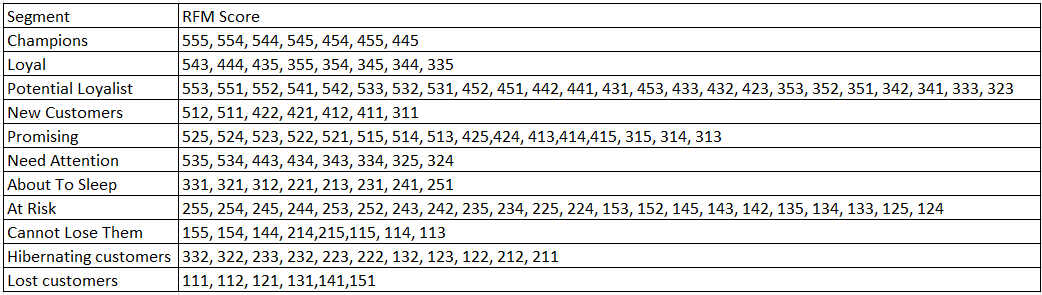

In [208]:
champions = pd.Series("Champions", index=[555, 554, 544, 545, 454, 455, 445])
loyal = pd.Series("Loyal", index=[543, 444, 435, 355, 354, 345, 344, 335])
potential = pd.Series("Potential Loyalist", index=[553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323])
new = pd.Series("New Customers", index=[512, 511, 422, 421, 412, 411, 311])
promising= pd.Series("Promising", index=[525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313])
need = pd.Series("Need Attention", index=[535, 534, 443, 434, 343, 334, 325, 324])
sleep = pd.Series("About To Sleep", index=[331, 321, 312, 221, 213, 231, 241, 251])
risk = pd.Series("At Risk", index=[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124])
not_lose = pd.Series("Cannot Lose Them", index=[155, 154, 144, 214,215,115, 114, 113])
hiber = pd.Series("Hibernating customers", index=[332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211])
lost = pd.Series("Lost customers", index=[111, 112, 121, 131,141,151])

#tạo 1 summary series để map(ánh xạ) giá trị vào dataframe
sumary_series = pd.concat([champions, loyal, potential, new, promising, need, sleep, risk, not_lose, hiber, lost], axis=0)
sumary_series

555         Champions
554         Champions
544         Champions
545         Champions
454         Champions
            ...      
112    Lost customers
121    Lost customers
131    Lost customers
141    Lost customers
151    Lost customers
Length: 125, dtype: object

In [209]:
seg_table["Segment"] = seg_table["RFM_score"].map(sumary_series)
seg_table.sample(5)

,CustomerID,Recency,R_score,Frequency,F_score,Monetary,M_score,RFM_score,Segment
2046,15136,23,5,4,4,1286.70,4,544,Champions
5317,19266,219,2,1,2,0.00,1,221,About To Sleep
1078,13806,84,3,1,3,256.38,2,332,Hibernating customers
2995,16426,23,5,10,5,1908.25,5,555,Champions
454,12933,45,4,3,4,607.53,3,443,Need Attention


# PART 3: VISUALIZATION


In [210]:
seg_table.head()

,CustomerID,Recency,R_score,Frequency,F_score,Monetary,M_score,RFM_score,Segment
0,12346,346,1,1,1,77183.60,5,115,Cannot Lose Them
1,12347,23,5,7,5,4310.00,5,555,Champions
2,12348,96,3,4,4,1797.24,4,344,Loyal
3,12349,39,5,1,3,1757.55,4,534,Need Attention
4,12350,331,1,1,3,334.40,3,133,At Risk


### RFM Segments of Customer Count

In [211]:
grp1 = seg_table.groupby("Segment").agg({"CustomerID":"count"}).sort_values("CustomerID", ascending=False).reset_index().rename(columns={"CustomerID":"CountCus"})
grp1["CountShare%"] = round((grp1["CountCus"] / grp1["CountCus"].sum())*100,2)
grp1

,Segment,CountCus,CountShare%
0,Champions,1206,18.63
1,Hibernating customers,839,12.96
2,About To Sleep,651,10.06
3,Loyal,621,9.59
4,Potential Loyalist,608,9.39
5,At Risk,586,9.05
6,Lost customers,561,8.67
7,Need Attention,450,6.95
8,Cannot Lose Them,382,5.90
9,Promising,296,4.57


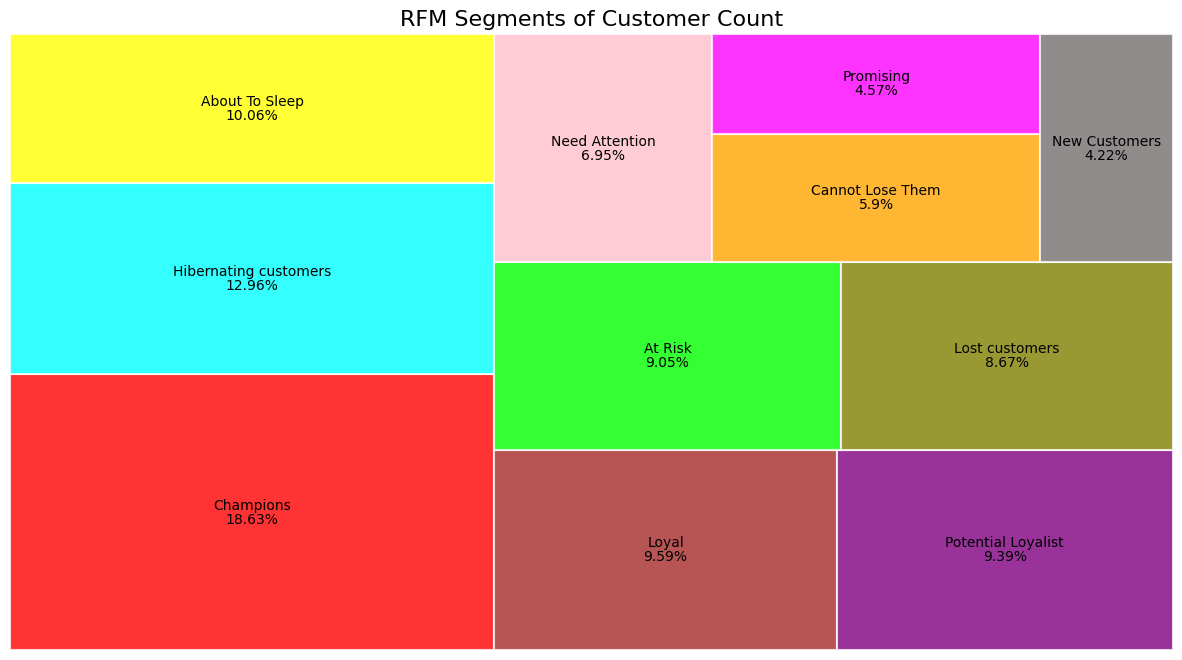

In [212]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']
fig,ax = plt.subplots(1, figsize=(15,8))

squarify.plot(sizes=grp1["CountCus"]
              , label=grp1["Segment"]
              , value=[f'{x}%' for x in grp1["CountShare%"]]
              , alpha=.8
              , color=colors
              , bar_kwargs=dict(linewidth=1.5, edgecolor="white"))
plt.title("RFM Segments of Customer Count", fontsize=16)
plt.axis("off")
plt.show()

=> số lượng tệp At Risk, New Customers, Potential Loyalist và Cannot Lose Them là nhiều nhất

=> đặc trưng KH của DN là: lâu rồi chưa mua? mua thường xuyên??

### Distribution: R, F, M

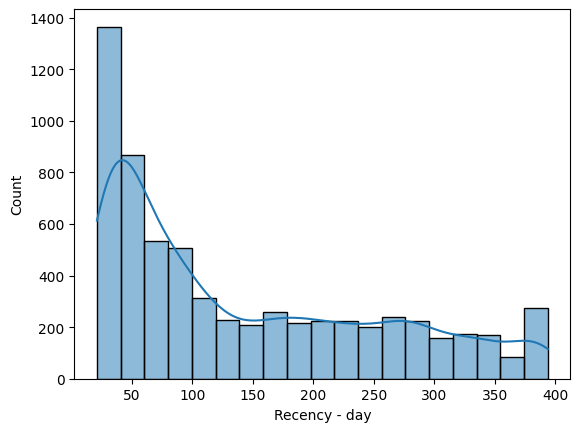

In [213]:
sns.histplot(data=seg_table["Recency"], kde=True)
plt.xlabel("Recency - day")

plt.show()

=> số ngày KH chưa giao dịch lại nằm trong khoảng [20,400)

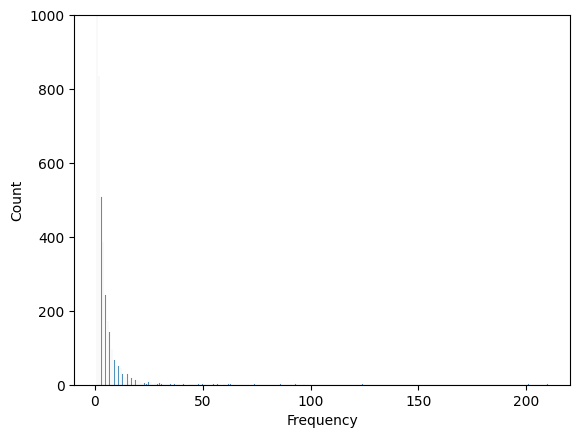

In [214]:
g = sns.histplot(data=seg_table["Frequency"], kde=False)
g.set(ylim=(0,1000))
plt.show()

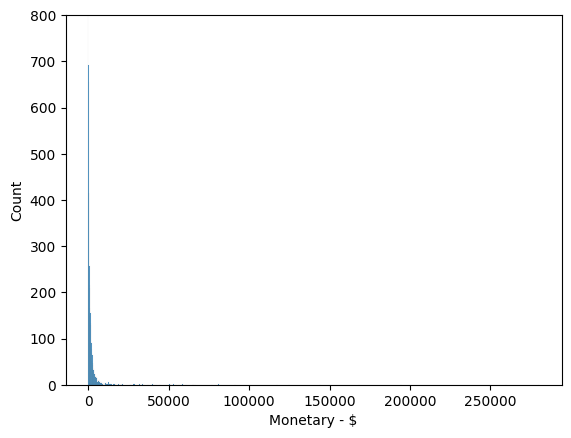

In [215]:
a = sns.histplot(data=seg_table["Monetary"],kde=False)
plt.xlabel("Monetary - $")
a.set(ylim=(0,800))
plt.show()

### RFM Segments of Monetary Sum, Mean

In [216]:
grp2 = seg_table.groupby("Segment").agg({"Monetary":"sum"}).reset_index().rename(columns={"Monetary":"MoneSum"}).sort_values("MoneSum",ascending=False)
grp2["MoneShare%"] = round((grp2["MoneSum"] / grp2["MoneSum"].sum()) * 100, 2)
grp2

,Segment,MoneSum,MoneShare%
3,Champions,6614477.080,62.01
6,Loyal,941903.961,8.83
2,Cannot Lose Them,762799.070,7.15
1,At Risk,756115.291,7.09
10,Promising,585801.501,5.49
7,Need Attention,487670.391,4.57
9,Potential Loyalist,220662.640,2.07
4,Hibernating customers,214775.650,2.01
0,About To Sleep,33793.020,0.32
5,Lost customers,28708.080,0.27


In [ ]:
  #array: chứa vales cột MoneShare%
percent_vals = np.array(grp2["MoneShare%"])
colors = ['#058b32','#0000ee','#FF0000','#FF0000','#800080','#FF0000','#0000ee','#FFFF00','#FFFF00','#FF00FF','#736F6E']
  #bar plot
grp2.plot(kind="bar", x="Segment", y="MoneShare%",color=colors).get_legend().remove()
plt.title("RFM Segments of Monetary %", fontsize=16)
  #add data label
for i, value in enumerate(percent_vals):
    plt.text(i, value + 0.1, str(value)+'%', ha='center', va='bottom')

plt.show()

In [ ]:
grp3 = seg_table.groupby("Segment").agg({"Monetary":"mean"}).sort_values("Monetary",ascending=False).rename(columns={"Monetary":"AvgMonetary"}).reset_index()
colors = ['#058b32','#FF0000','#800080','#0000ee','#FF0000','#FF0000','#0000ee','#FFFF00','#736F6E','#FFFF00','#FF00FF']
  #array: chứa cột AvgMonetary
avg_vals = np.array(grp3["AvgMonetary"])
  #barplot
grp3.plot(kind="bar", x="Segment",y="AvgMonetary",color=colors).get_legend().remove()
plt.title("RFM Segments of Monetary Average")
  #thêm data label
for i, value in enumerate(avg_vals):
    plt.text(i, value + 0.1, round(value), ha='center', va='bottom')
plt.show()